In [9]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

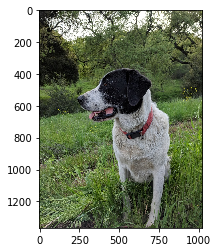

In [11]:
plt.imshow(full)

In [12]:
full.shape

(1367, 1025, 3)

In [13]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

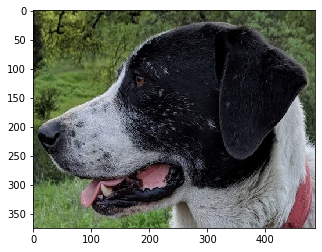

In [14]:
plt.imshow(face)

In [15]:
face.shape

(375, 486, 3)

In [16]:
sum([1,2,3])

6

In [17]:
mystring = 'sum'

In [18]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [19]:
myfunc = eval(mystring)

In [20]:
myfunc

<function sum(iterable, start=0, /)>

In [21]:
myfunc([1,2,3])

6

In [22]:
myfunc([1,2,3,4])

10

In [23]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

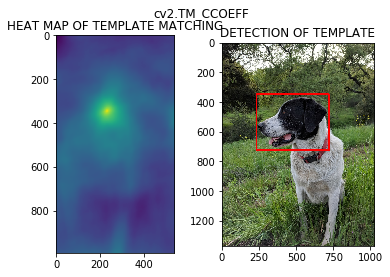

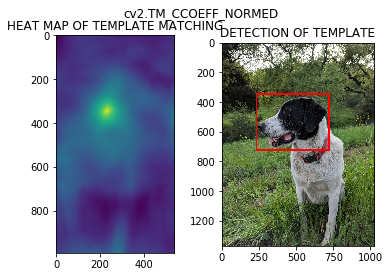

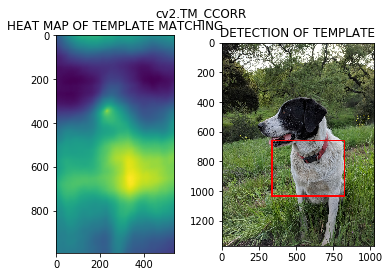

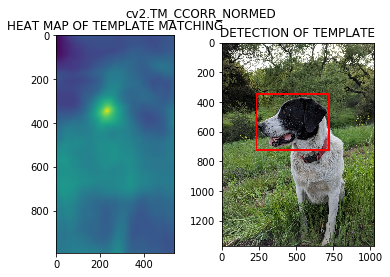

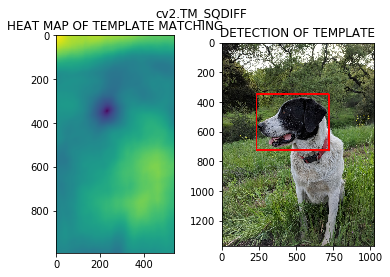

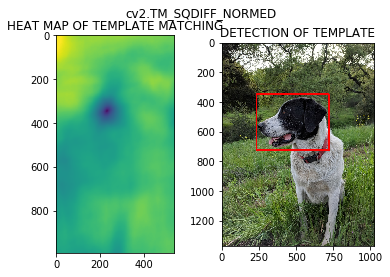

In [32]:
for m in methods:
    
    # create a copy of a image
    full_copy = full.copy()
    
    method = eval(m)
    
    # template matching
    res = cv2.matchTemplate(full_copy,face,method)
    
    # it takes the heat map and find minimum and maximum value and location(tupple and packing)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x,y)
    else:
        top_left = max_loc
        
    height, width, channel = face.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy,top_left,bottom_right, (255,0,0),10)
    
    # plot and show the images
    plt.subplot(121) # 121 means 1 row 2 columns and grab the first one ,we have 2 images right next to it left and right
    plt.imshow(res)
    plt.title('HEAT MAP OF TEMPLATE MATCHING')
    
    
    plt.subplot(122) # 122 means 1 row 2 columns and grab the second one
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    #TITLE WITH THE METHOD USED
    plt.suptitle(m)
    print('\n')
    plt.show() # if we don't write this command this will overlap image and we only have the one image
    print('\n')
    

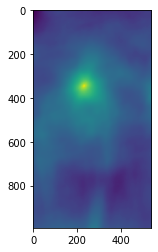

In [26]:
# # example of just one 'cv2.TM_CCOEFF' thing can do in template matching. it takes the highest value
# my_method = eval('cv2.TM_CCOEFF')
# res = cv2.matchTemplate(full,face,my_method)
# plt.imshow(res)